### Gradient Descent Algorithm 
content
- Simple gradient descent 
- Momentum 
- Nesterov's Accelarated Gradient


** Import any packages needed ** 

In [72]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

from gd import gd_pv_2d

**Directories and paths**

In [73]:
# Set directories
print(os.getcwd())
dir_ = os.getcwd()
dirImages = dir_ + "/images/"

/home/jovyan/aml_2019_G7-master


** Tasks **

- Implement the Six-Hump Camel Function

$$f\big(x_1,x_2\big) = \Bigg(4-2.1x_1^2+\frac{x_1^4}{3}\Bigg)x_1^2+x_1x_2+\Big(-4+4x_2^2\Big)x_2^2$$

- Implement the first order derivatives with respect to the two variables

\begin{align}
\frac{\partial f(x_1,x_2)}{\partial x_1} &= 8x_1-8.4x_1^3 + 2x_1^5+x_2 \\
\frac{\partial f(x_1,x_2)}{\partial x_2} &= -8x_2 + 16x_2^3 + x_1 
\end{align}

Note: x_0 and x_1 refers to the variable $x_1$ and $x_2$ respectively.

In [74]:
# Define the Six-Hump Camel Function
def fn_loss(x_0,x_1):
    return (4-2.1*x_0**2+x_0**4/3)*x_0**2 + x_0*x_1 + (-4+4*x_1**2)*x_1**2

# Define its partial derivative w.r.t its two variables
def fn_grad(x_0,x_1):
    delta_0 = 8*x_0-8.4*x_0**3 + 2*x_0**5+x_1
    delta_1 = -8*x_1 + 16*x_1**3 + x_0
    return np.array([delta_0, delta_1])

### Simple Gradient Descent 

** Tasks **

- Experiment with different step sizes: $$0.0005\times \big[2^0,2^1,2^2,2^3,2^4,2^5,2^6,2^7,2^8,2^9\big]$$
- Print a table to summarise how the number of steps taken varies with step sizes
- Plot graphs of
    - number of steps taken against step sizes (Right)
    - minimum values found by the GD algorithm against step sizes (Left)

		Try Different Step Sizes		
--------------------------------------------------------------
Step size 	Number of step      	Minimum value       
--------------------------------------------------------------
0.0005    	2726                	-1.0316283884340618 
0.001     	1362                	-1.031628388614742  
0.002     	681                 	-1.0316283909500579 
0.004     	340                 	-1.0316283936055437 
0.008     	170                 	-1.0316284021546793 
0.016     	84                  	-1.0316284055900546 
0.032     	42                  	-1.0316284310824462 
0.064     	20                  	-1.0316284445449253 
0.128     	10001               	-0.9882146984963891 
0.256     	10001               	nan                 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 1.0, 'Minimum value of the function ')

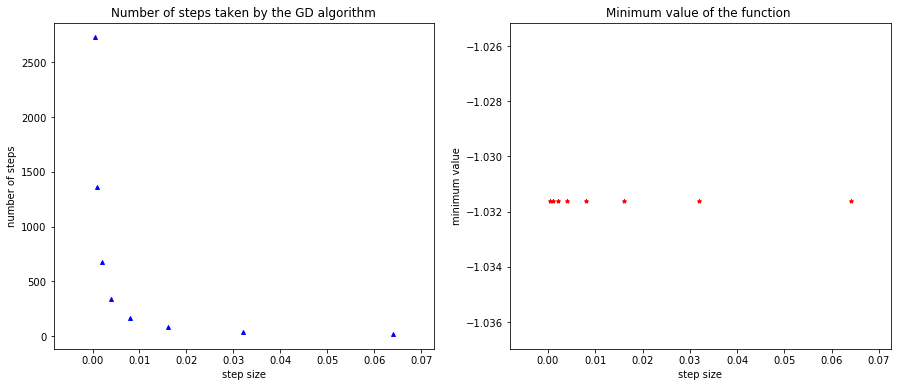

In [75]:
# Experiment with different step sizes
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
eta = [0.0005,0.001,0.002,0.004,0.008,0.016,0.032,0.064,0.128,0.256]
n_iter = []
fn_min = []
print('\t\tTry Different Step Sizes\t\t')
print('--------------------------------------------------------------')
print('{0:<10s}\t{1:<20s}\t{2:<20s}'.format('Step size','Number of step','Minimum value'))
print('--------------------------------------------------------------')
for i in range(len(eta)):
    #print('Try step size = {},'.format(i))
    solver.find_min(x_init = [1,-1], n_iter = 10000, eta = eta[i], tol = 1e-3)
    n_iter.append(np.round(solver.n_iter))
    fn_min.append(solver.loss_fn_min)
    print('{0:<10}\t{1:<20}\t{2:<20}'.format(eta[i],n_iter[i],fn_min[i]))
    #print('\tthe number of steps = {}.'.format(np.round(n_iter, 7)))
    
    
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(eta[0:8], n_iter[0:8], color='blue',marker = '^',s = 15)
ax1.set_xlabel('step size')
ax1.set_ylabel('number of steps')
ax1.set_title('Number of steps taken by the GD algorithm')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(eta[0:8], fn_min[0:8], color='red',marker = '*',s = 15)
ax2.set_xlabel('step size')
ax2.set_ylabel('minimum value')
ax2.set_title('Minimum value of the function ')

The above table and graphs show the relationship between the step sizes and and the number of steps to convergence. As we doubled the step size, the number of steps decrease by rough half. However, the relationship did not hold forever. The gradient descent did not converge (within 10000 steps) if eta was 0.128 or above. The above experiment shows two main challenges for our algorithm:
- algorithm takes a long time to convergence if step size is too small
- path does not converge at all if the step size is too big

In [76]:
fig.savefig(dirImages + "step_size.png", bbox_inches='tight')

## Plain vanilla

Converged in 426 steps. Loss fn -0.21546379471670118 achieved by [1.7036587964905998, -0.7961043702148882]


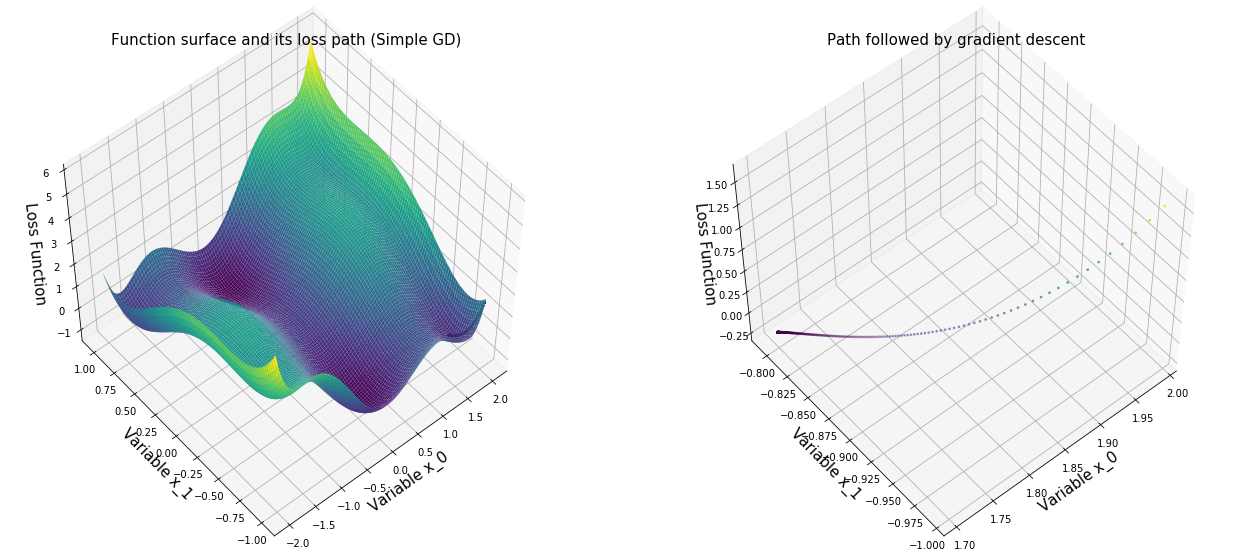

In [77]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.find_min(x_init = [2.0,-1.0], n_iter = 3000, eta = 0.001, tol = 1e-3)
print('Converged in {} steps. Loss fn {} achieved by {}'.format(solver.n_iter, solver.loss_fn_min, solver.x_at_min))

#===============
#  First subplot
#===============
# Plot the function surface 
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='viridis')



# Plot the x_path of the gradient descent 
x_path_0 = np.array(solver.x_path)[:,0]
x_path_1 = np.array(solver.x_path)[:,1]
z_path = fn_loss(x_path_0, x_path_1)
ax.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 3,linewidths=1,
           facecolors='black', edgecolors='black');

ax.set_xlabel('Variable x_0',fontsize=15)
ax.set_ylabel('Variable x_1',fontsize=15)
ax.set_zlabel('Loss Function',fontsize=15)
ax.set_title('Function surface and its loss path (Simple GD)',fontsize=15);

ax.view_init(55, -130)

#===============
#  Second subplot
#===============
cmap = matplotlib.cm.get_cmap('viridis')
loss_path_log = z_path
normalize = matplotlib.colors.Normalize(vmin=min(loss_path_log), 
                                        vmax=max(loss_path_log))
colours = [cmap(normalize(value)) for value in loss_path_log]

# A closer viewing of the path followed by GD algorithm
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 3,linewidths=1,
           color=colours);

ax1.set_xlabel('Variable x_0',fontsize=15)
ax1.set_ylabel('Variable x_1',fontsize=15)
ax1.set_zlabel('Loss Function',fontsize=15)
ax1.set_title('Path followed by gradient descent',fontsize=15);

ax1.view_init(55, -130)

In [78]:
fig.savefig(dirImages + "gd_01_pv.png", bbox_inches='tight')

The graph(left) shows the Six-Hump Camel Function and the path followed by gradient descent. The graph shows that the gradient descent algorithm stopped at a local minima (or probably a saddle point where the gradients in both directions are approximating zero). This is one of the challenge for our simple gradient descent algorithm. We further experimented with two variants of gradient descent using the same set of parameters.
- Momentum
- Nesterov's Accelarated Gradient


### Momentum

In [82]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.momentum(x_init = [2.0,-1.0], n_iter = 3000, eta = 0.001, tol = 1e-3, alpha = 0.99)

Converged in 1460 steps.  Loss fn -1.0316283918420706 achieved by x = [0.08971887244787315, -0.7126297690230323]


Converged in 1460 steps.  Loss fn -1.0316283918420706 achieved by x = [0.08971887244787315, -0.7126297690230323]


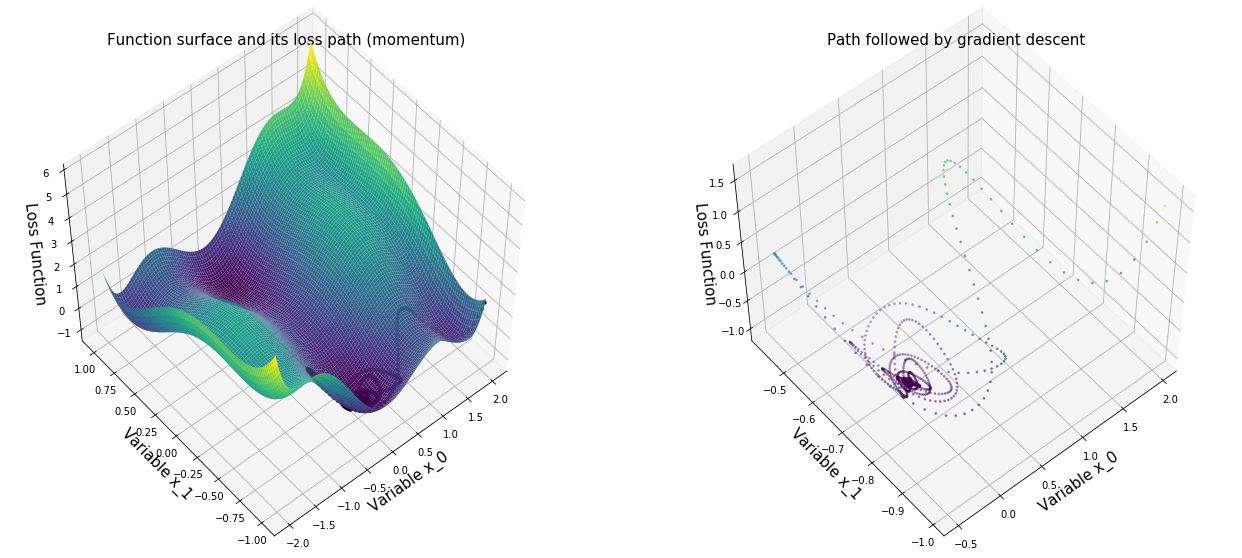

In [83]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.momentum(x_init = [2.0,-1.0], n_iter = 3000, eta = 0.001, tol = 1e-3, alpha = 0.99)


#===============
#  First subplot
#===============
# Plot the function surface 
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='viridis')



# Plot the x_path of the gradient descent 
x_path_0 = np.array(solver.x_path)[:,0]
x_path_1 = np.array(solver.x_path)[:,1]
z_path = fn_loss(x_path_0, x_path_1)
ax.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 8,linewidths=1,
           facecolors='black', edgecolors='black');

ax.set_xlabel('Variable x_0',fontsize=15)
ax.set_ylabel('Variable x_1',fontsize=15)
ax.set_zlabel('Loss Function',fontsize=15)
ax.set_title('Function surface and its loss path (momentum)',fontsize=15);

ax.view_init(55, -130)

#===============
#  Second subplot
#===============
cmap = matplotlib.cm.get_cmap('viridis')
loss_path_log = z_path
normalize = matplotlib.colors.Normalize(vmin=min(loss_path_log), 
                                        vmax=max(loss_path_log))
colours = [cmap(normalize(value)) for value in loss_path_log]

# A closer viewing of the path followed by GD algorithm
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 3,linewidths=1,
           color=colours);

ax1.set_xlabel('Variable x_0',fontsize=15)
ax1.set_ylabel('Variable x_1',fontsize=15)
ax1.set_zlabel('Loss Function',fontsize=15)
ax1.set_title('Path followed by gradient descent',fontsize=15);

ax1.view_init(55, -130)


In [84]:
fig.savefig(dirImages + "gd_02_mm.png", bbox_inches='tight')

### Nesterov's Accelarated Gradient (NAG)

In [85]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.nag(x_init = [2.0,-1.0], n_iter = 3000, eta = 0.001, tol = 1e-3, alpha = 0.995)

Converged in 856 steps.  Loss fn -1.0316276827602626 achieved by x = [0.09028833229149283, -0.7126779280228093]


Converged in 607 steps.  Loss fn -1.0316272989132922 achieved by x = [0.08930906027559363, -0.7125413221465432]


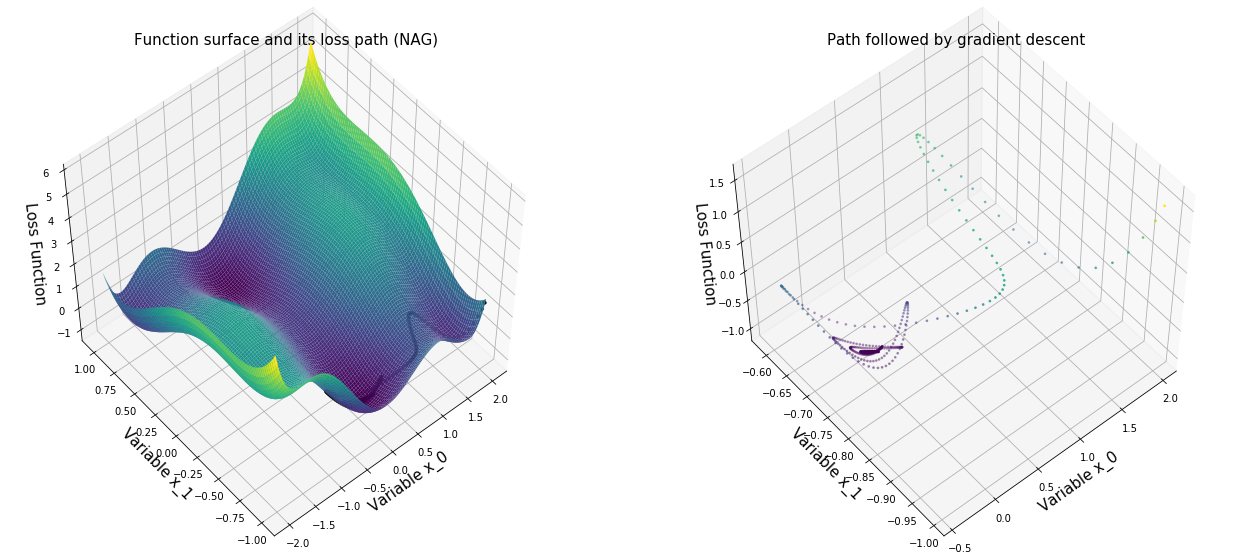

In [86]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.nag(x_init = [2.0,-1.0], n_iter = 3000, eta = 0.001, tol = 1e-3, alpha = 0.99)


#===============
#  First subplot
#===============
# Plot the function surface 
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)
fig = plt.figure(figsize=(22,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap='viridis')



# Plot the x_path of the gradient descent 
x_path_0 = np.array(solver.x_path)[:,0]
x_path_1 = np.array(solver.x_path)[:,1]
z_path = fn_loss(x_path_0, x_path_1)
ax.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 8,linewidths=1,
           facecolors='black', edgecolors='black');

ax.set_xlabel('Variable x_0',fontsize=15)
ax.set_ylabel('Variable x_1',fontsize=15)
ax.set_zlabel('Loss Function',fontsize=15)
ax.set_title('Function surface and its loss path (NAG)',fontsize=15);

ax.view_init(55, -130)

#===============
#  Second subplot
#===============
cmap = matplotlib.cm.get_cmap('viridis')
loss_path_log = z_path
normalize = matplotlib.colors.Normalize(vmin=min(loss_path_log), 
                                        vmax=max(loss_path_log))
colours = [cmap(normalize(value)) for value in loss_path_log]

# A closer viewing of the path followed by GD algorithm
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax1.scatter(x_path_0, x_path_1, z_path, marker = 'o',s = 3,linewidths=1,
           color=colours);

ax1.set_xlabel('Variable x_0',fontsize=15)
ax1.set_ylabel('Variable x_1',fontsize=15)
ax1.set_zlabel('Loss Function',fontsize=15)
ax1.set_title('Path followed by gradient descent',fontsize=15);

ax1.view_init(55, -130)

In [87]:
fig.savefig(dirImages + "gd_03_nag.png", bbox_inches='tight')